# Clasificación Básica: Predecir una imagen de moda
Esta guía entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas. 
Esta guía usa tf.keras, un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
# Librerías de ayuda
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

C:\Users\walgom\Anaconda37\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\walgom\Anaconda37\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\walgom\Anaconda37\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\walgom\Anaconda37\envs\keras\lib\site-packages\tensorflow\

1.13.2


## Importar el set de datos de moda de MNIST
Esta guía usa el set de datos de Fashion MNIST que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran artículos individuales de ropa a una resolución baja (28 por 28 pixeles) como se ve aca:

![alt text](fashion-mnist-sprite.png "Title")

Moda MNIST esta construida como un reemplazo para el set de datos clasico MNIST casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automático (ML). El set de datos de MNIST contiene imágenes de dígitos escrito a mano (0, 1, 2, etc.) en un formato idéntico al de los articulos de ropa que va a utilizar aca.

Esta guía utiliza el set Moda MNIST para variar el ejercicio y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequeños y son usados para verificar que el algoritmo funciona.

Acá, se usan 60,000 para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar qué tanto aprendió la red a clasificar imágenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set se puede utilziar el siguiente código:

In [29]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

El arreglo train_images y train_labels son los arreglos que training set—el modelo de datos usa para aprender.

El modelo es probado contra los arreglos test set, el test_images, y test_labels.

Las imagenes son arreglos de NumPy de 28x28, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de enteros, que van del 0 al 9. Estos corresponden a la clase o la etiqueta de ropa que la imagen representa.

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorando el set de datos
Exploramos el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, cada imagen de 28x28 pixeles:

In [31]:
train_images.shape

(60000, 28, 28)

Así mismo, hay 60,000 etiquetas en el set de entrenamiento:

In [32]:
len(train_labels)

60000

Cada etiqueta es un entero entre 0 y 9:

In [33]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es de 28x28 pixeles:

In [34]:
test_images.shape

(10000, 28, 28)

In [35]:
len(test_labels)

10000

## Pre-proceso el set de datos
El set de datos debe ser pre-procesado antes de entrenar la red. Si se inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

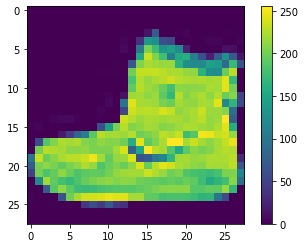

In [36]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, simplemente divida los valores por 255. 
Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes de el training set y colocamos el nombre de cada clase debajo de cada imagen.

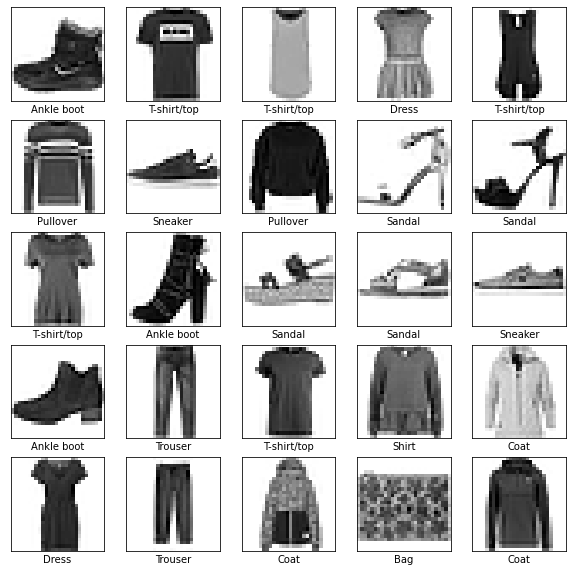

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo
Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Los bloques de construcción basicos de una red neuronal son las capas o layers. Las capas extraen representaciones del set de datos. Posteriormente, estas representaciones son consideradas para el problema que estamos solucionando.

La mayoría de aprendizaje profundo (Deep Learning), consiste de unir capas sencillas. La mayoría de las capas como `tf.keras.layers.Dense`, tienen parámetros que son "aprendidos" durante el entrenamiento.

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28*28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Esta capa no tiene parametros que aprender; solo reformatea el set de datos (los aplana).

Después de que los pixeles de la imagen estan "aplanados", la secuencia consiste de dos capas `tf.keras.layers.Dense`. Estas estan completamente conectadas (de allí el vocablo dense). La primera capa, Dense tiene 128 nodos (o neuronas). La segunda (y última) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. 
Cada nodo contendrá una calificación que indica la probabilidad de que una imagen pertenezca a una de las 10 clases.

## Compilar el modelo
Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* Loss function: Mide que tan exacto es el modelo durante el entrenamiento. Busca minimizar la función para dirigir el modelo en la direccion adecuada.
* Optimizer: Determina como el modelo se actualiza basánse en el set de datos la función de perdida.
* Metrics: Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa la métrica accuracy (exactitud), o la fracción de las imágenes que son correctamente clasificadas.

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo
Entrenar el modelo de red neuronal contiene los siguientes pasos:

1. Entregar los datos de entrenamiento al modelo. En este ejemplo, los set de datos de entrenamiento estan en los arreglos train_images y train_labels.
2. El modelo aprende a asociar imagenes y etiquetas.
3. Se realiza la consulta al modelo que haciendo predicciones sobre un set de datos que se encuentran incluidos en el arreglo test_images. Luego, se verifica que las predicciones sean iguales a las etiquetas de el arreglo test_labels.

Para comenzar a entrenar, utilice el método `model.fit`

In [41]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5004 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3751 - acc: 0.8654s - loss: 0
Epoch 3/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.3381 - acc: 0.8769
Epoch 4/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.3149 - acc: 0.8855
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2964 - acc: 0.8903
Epoch 6/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.2825 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2707 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2596 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2511 - acc: 0.9058
Epoch 10/10
60000/60000 [==============================] -

A medida que el modelo entrena, la perdida y la exactitud se van mostrando. Este modelo, alcanza una exactitud de 0.91 (o 91%) sobre el set de datos de entrenamiento. Pero mejor, comprobémoslo con el set de datos de pruebas

## Evaluar Exactitud
Como nos queda la duda de cómo se comporta con el set de datos de pruebas, comparemos los resultados con ese set. veamos:

In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

 - 1s - loss: 0.3439 - acc: 0.8809

Test accuracy: 0.8809


¡Uy! como era de esperarse, la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. 

## Hacer predicciones
Puede que el modelo no sea tan bueno como esperabamos. Sin embargo podemos usarlo para hacer predicciones sobre imagenes.

In [43]:
predictions = model.predict(test_images)

Aquí el modelo ha predecido la etiqueta para cada imagen en el set de datos de test (prueba). Miremos la primera prediccion:

In [44]:
predictions[0]

array([3.4093358e-07, 2.4368094e-09, 4.7215252e-08, 3.6436629e-09,
       7.1587984e-08, 7.8669324e-04, 3.0688703e-08, 7.6637203e-03,
       3.4701793e-07, 9.9154872e-01], dtype=float32)

Una predicción es un arreglo de 10 números. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 artículos ropa. Con esto, se puede revisar cuál tiene el nivel mas alto de confianza.

In [45]:
np.argmax(predictions[0])

9

Recontra uy! Parece que el modelo, tiene mayor confianza que esta imagen es un "ankle boot" o class_names con el código 9 en términos del modelo. Examinando las etiquetas de test, se puede evidenciar ésta clasificación es correcta:

In [46]:
test_labels[0]

9

Ahora creamos unas funciones para ver todo el set de prediccion para las 10 clases.

In [47]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas estan en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

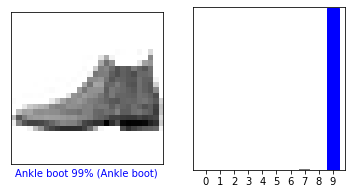

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Intentemos con otro...

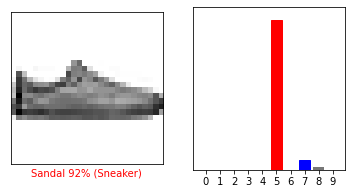

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar múltiples imagenes con sus predicciones. Nótese que el modelo puede estar equivocado aún cuando tiene mucha "confianza".

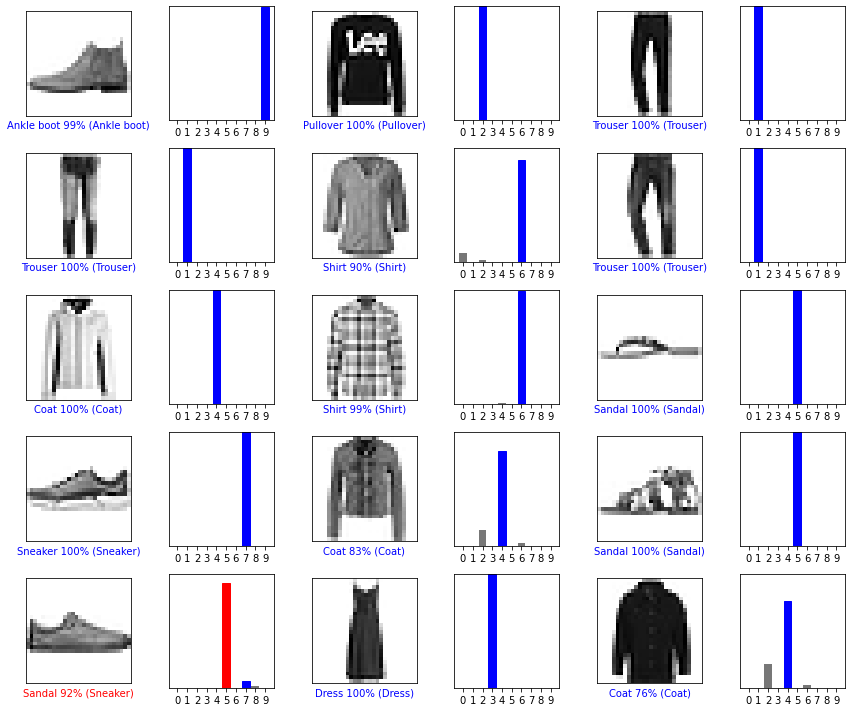

In [50]:
# Grafica las primeras imágenes de prueba, sus etiquetas pronosticadas y la etiqueta real.
# Las predicciones en azul son correctas y en rojo las incorrectas.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [51]:
# Tomemos una imagen del set de prueba.
img = test_images[1]
print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre batch o bloques, o colecciones de ejemplos por vez. De acuerdo a esto, aunque use una única imagen toca agregarla a una lista:

In [52]:
# Agregar la imágen al batch donde sería el único miembro.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [53]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.5012648e-06 6.3320111e-14 9.9938798e-01 4.4711221e-10 1.6025355e-04
  8.7060215e-15 4.4924510e-04 1.2243998e-17 4.1656960e-12 1.7060740e-19]]


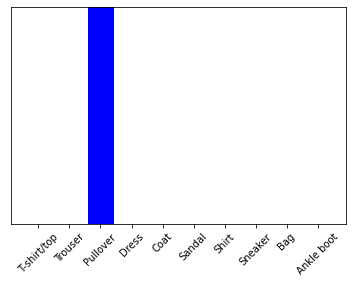

In [54]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del batch o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del batch o bloque:

In [55]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.

# ¡Tan tán! ¡Fin!